# XOR 문제 구현 - 단층 퍼셉트론

### 1. GPU 연산 세팅

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = 'cuda'if torch.cuda.is_available() else 'cpu'
torch.manual_seed(77)
if device == 'cuda' :
    torch.cuda.manual_seed_all(77)

In [2]:
device

'cpu'

### 2. 입출력 정의, 신경망 정의

In [3]:
X = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2, 1, bias = True) #nn.Linear() 는 파라미터 (가중치) 초깃값을 랜덤하게 지정. (seed 로 고정함)
print("Random Parameters :\n", list(linear.parameters()))

sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device) # nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 함

Error_func = torch.nn.BCELoss().to(device) # Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

Random Parameters :
 [Parameter containing:
tensor([[-0.2943, -0.3031]], requires_grad=True), Parameter containing:
tensor([-0.1385], requires_grad=True)]


In [4]:
print("딥러닝 모델의 초기 예측값 : \n", model(X))

딥러닝 모델의 초기 예측값 : 
 tensor([[0.4654],
        [0.3914],
        [0.3935],
        [0.3239]], grad_fn=<SigmoidBackward>)


0 0.7221513390541077
100 0.7221513390541077
200 0.7221513390541077
300 0.7221513390541077
400 0.7221513390541077
500 0.7221513390541077
600 0.7221513390541077
700 0.7221513390541077
800 0.7221513390541077
900 0.7221513390541077
1000 0.7221513390541077
1100 0.7221513390541077
1200 0.7221513390541077
1300 0.7221513390541077
1400 0.7221513390541077
1500 0.7221513390541077
1600 0.7221513390541077
1700 0.7221513390541077
1800 0.7221513390541077
1900 0.7221513390541077
2000 0.7221513390541077
2100 0.7221513390541077
2200 0.7221513390541077
2300 0.7221513390541077
2400 0.7221513390541077
2500 0.7221513390541077
2600 0.7221513390541077
2700 0.7221513390541077
2800 0.7221513390541077
2900 0.7221513390541077
3000 0.7221513390541077
3100 0.7221513390541077
3200 0.7221513390541077
3300 0.7221513390541077
3400 0.7221513390541077
3500 0.7221513390541077
3600 0.7221513390541077
3700 0.7221513390541077
3800 0.7221513390541077
3900 0.7221513390541077
4000 0.7221513390541077
4100 0.7221513390541077
4200

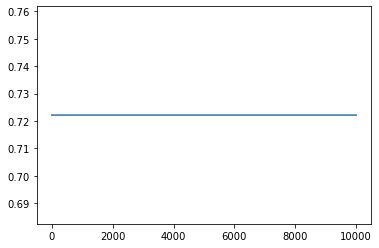

In [5]:
Error_list = []

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    Error = Error_func(hypothesis, Y) # (NN의 Output, 실제값)
    Error_list.append(Error.item())
    Error.backward # 기울기 계산
    optimizer.step() # 기울기 업데이트
    
    if step % 100 == 0:
        print(step, Error.item())

plt.plot(Error_list)

In [6]:
print("심층학습 후 예측값 : \n", hypothesis)

심층학습 후 예측값 : 
 tensor([[0.4654],
        [0.3914],
        [0.3935],
        [0.3239]], grad_fn=<SigmoidBackward>)


# 2. XOR 문제 구현 - 다층 퍼셉트론

In [12]:
model = nn.Sequential(
            nn.Linear(2, 2, bias = True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias = True),
            nn.Sigmoid()
            ).to(device)

Error_func = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
print("딥러닝 모델의 초기 예측값 : \n", model(X))

딥러닝 모델의 초기 예측값 : 
 tensor([[0.5746],
        [0.5761],
        [0.5749],
        [0.5764]], grad_fn=<SigmoidBackward>)


0 0.7046864032745361
100 0.693143904209137
200 0.6931347250938416
300 0.6931177973747253
400 0.6930813789367676
500 0.692985475063324
600 0.6926401853561401
700 0.6905759572982788
800 0.6724609732627869
900 0.5953705906867981
1000 0.5054583549499512
1100 0.30456316471099854
1200 0.10515540838241577
1300 0.054874591529369354
1400 0.036217100918293
1500 0.026803676038980484
1600 0.02118988335132599
1700 0.017480909824371338
1800 0.01485578715801239
1900 0.012903778813779354
2000 0.011397359892725945
2100 0.010200736112892628
2200 0.009227940812706947
2300 0.008421977050602436
2400 0.007743650581687689
2500 0.007165009621530771
2600 0.006665731780230999
2700 0.0062306588515639305
2800 0.005848269443958998
2900 0.005509541369974613
3000 0.005207464098930359
3100 0.004936434794217348
3200 0.0046919044107198715
3300 0.004470188170671463
3400 0.004268305841833353
3500 0.004083657171577215
3600 0.003914183005690575
3700 0.0037580509670078754
3800 0.0036138035356998444
3900 0.003480104729533195

Text(0, 0.5, 'Error')

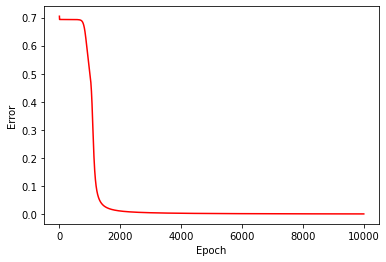

In [13]:
Error_list = []

for epoch in range(10001):
    optimizer.zero_grad()
    
    hypothesis = model(X)
    
    Error = Error_func(hypothesis, Y)
    Error.backward()
    Error_list.append(Error.item())
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, Error.item())

plt.plot(Error_list, color = 'red')
plt.xlabel("Epoch")
plt.ylabel("Error")

In [14]:
print(list(model.named_parameters()))

[('0.weight', Parameter containing:
tensor([[7.9285, 7.9229],
        [6.1080, 6.1070]], requires_grad=True)), ('0.bias', Parameter containing:
tensor([-3.6671, -9.3303], requires_grad=True)), ('2.weight', Parameter containing:
tensor([[ 14.7213, -15.5101]], requires_grad=True)), ('2.bias', Parameter containing:
tensor([-6.9631], requires_grad=True))]


In [15]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: 0.weight | Size: torch.Size([2, 2]) | Values : tensor([[7.9285, 7.9229],
        [6.1080, 6.1070]], grad_fn=<SliceBackward>) 

Layer: 0.bias | Size: torch.Size([2]) | Values : tensor([-3.6671, -9.3303], grad_fn=<SliceBackward>) 

Layer: 2.weight | Size: torch.Size([1, 2]) | Values : tensor([[ 14.7213, -15.5101]], grad_fn=<SliceBackward>) 

Layer: 2.bias | Size: torch.Size([1]) | Values : tensor([-6.9631], grad_fn=<SliceBackward>) 



In [16]:
print("딥러닝 학습 후 에측값 : \n", model(X))
print((model(X) > 0.5).float())

딥러닝 학습 후 에측값 : 
 tensor([[1.3616e-03],
        [9.9905e-01],
        [9.9905e-01],
        [9.7584e-04]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
